In [60]:
"""
Author : Renato Gusani
Student No. x19411076
Programme : Bsc Data Science - Year 2 Semester 2
Module : Data Mining & Machine Learning
Date : 30/04/2021

Dataset used: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Kaggle Notebook Inspirations:


"""

# Importing relevant packacges
import os
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt # plots
plt.style.use('ggplot')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Regression + metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt # rmse

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Changing the path to my CA working directory
os.chdir('C:\\Users\\renat\\Documents\\BSc. (Honours) in Data Science\\Year 2\\Semester 2\\Data Mining & Machine Learning\\CA')

# Reading the original hour bike rental dataset file into a dataframe with pandas
bikehourly = pd.read_csv('hour.csv')

In [3]:
# printing missing values the bike hour data
bikehourly.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# checking the variable data types
bikehourly.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
# Renaming columns names in the hour file to more readable names
bikehourly.rename(columns={'instant':'record_index',
                     'dteday':'date',
                     'yr':'year',
                     'mnth':'month' ,
                     'hr':'hour' ,
                     'weathersit':'weather',
                     'temp':'temperature',
                     'atemp':'feeling_temperature',
                     'hum':'humidity',
                     'casual':'casual_users',
                     'registered':'registered_users' ,
                     'cnt':'all_users'},inplace=True)

In [6]:
# changing data types 
bikehourly['season'] = bikehourly.season.astype('category')
bikehourly['holiday'] = bikehourly.holiday.astype('category')
bikehourly['weekday'] = bikehourly.weekday.astype('category')
bikehourly['weather'] = bikehourly.weather.astype('category')
bikehourly['workingday'] = bikehourly.workingday.astype('category')
bikehourly['month'] = bikehourly.month.astype('category')
bikehourly['year'] = bikehourly.year.astype('category')

In [8]:
# checking the newlly changed variable data types and names
bikehourly.dtypes

record_index              int64
date                     object
season                 category
year                   category
month                  category
hour                      int64
holiday                category
weekday                category
workingday             category
weather                category
temperature             float64
feeling_temperature     float64
humidity                float64
windspeed               float64
casual_users              int64
registered_users          int64
all_users                 int64
dtype: object

In [9]:
# changing the season attribute to be more understandble
seasons = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
bikehourly['season'] = bikehourly['season'].apply(lambda x: seasons[x])

In [9]:
# changing the year attribute to be more understandble
years = {0: 2011, 1: 2012}
bikehourly['year'] = bikehourly['year'].apply(lambda x: years[x])

In [10]:
# changing the weekday attribute to be more understandble
weekdays = {0: 'Sun', 1: 'Mon', 2: 'Tues', \
3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'}
bikehourly['weekday'] = bikehourly['weekday'].apply(lambda x: weekdays[x])

In [11]:
# changing the weather attribute to be more understandble
weather = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
bikehourly['weather'] = bikehourly['weather'].apply(lambda x: weather[x])

In [12]:
# changing the workingday attribute to be more understandble
workdays = {1: 'workday', 0: 'nowork'}
bikehourly['workingday'] = bikehourly['workingday'].apply(lambda x: workdays[x])

In [13]:
# changing the weekdays attribute to be more understandble
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bikehourly['month'] = bikehourly['month'].apply(lambda x: months[x])

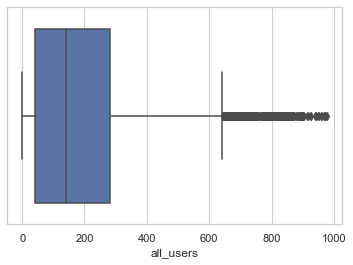

In [7]:
# Reference for the following code:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# checking for outliers
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=bikehourly["all_users"])

In [7]:
# removing outliers above 2 deviations
bikehourly_no_ouliers= bikehourly[np.abs(bikehourly["all_users"]-bikehourly["all_users"].mean())<=(2*bikehourly["all_users"].std())]

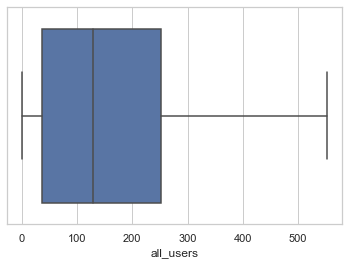

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=bikehourly_no_ouliers["all_users"])

In [17]:
# Reference for the following code:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Generates descriptive statistics for all numerical attributes (predictors)
bikehourly_no_ouliers.describe()

,record_index,hour,temperature,feeling_temperature,humidity,windspeed,casual_users,registered_users,all_users
count,16441.000000,16441.000000,16441.00000,16441.000000,16441.000000,16441.00000,16441.000000,16441.000000,16441.000000
mean,8460.235083,11.363725,0.48928,0.469023,0.633820,0.18897,31.082294,130.584636,161.666930
std,5008.722006,7.003123,0.19232,0.171954,0.192101,0.12259,41.576507,114.577232,141.047242
min,1.000000,0.000000,0.02000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,4134.000000,5.000000,0.34000,0.318200,0.480000,0.10450,3.000000,31.000000,36.000000
50%,8311.000000,11.000000,0.50000,0.484800,0.640000,0.16420,15.000000,107.000000,129.000000
75%,12745.000000,17.000000,0.64000,0.621200,0.790000,0.25370,43.000000,198.000000,251.000000
max,17379.000000,23.000000,1.00000,1.000000,1.000000,0.85070,317.000000,539.000000,552.000000


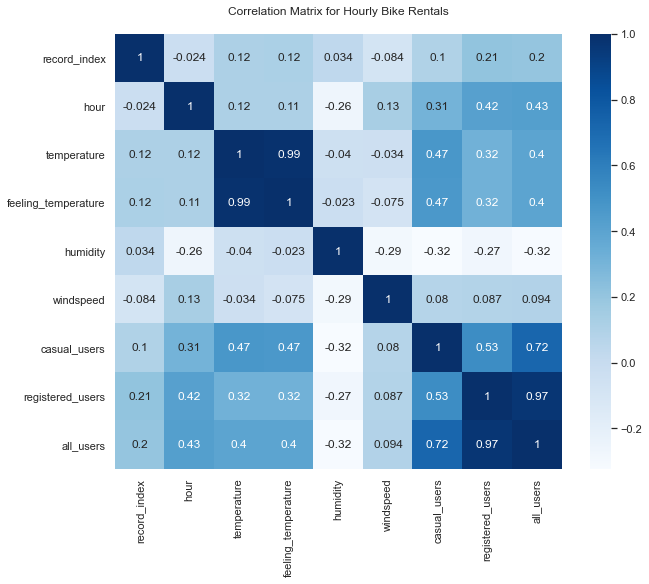

In [18]:
# References for the following code: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
# Plotting a correlation matrix with matplotlib.pyplot for the hourly bike rental file
plt.figure(figsize=(10, 8))
sns.heatmap(bikehourly_no_ouliers.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix for Hourly Bike Rentals', y=1.03)
plt.show()

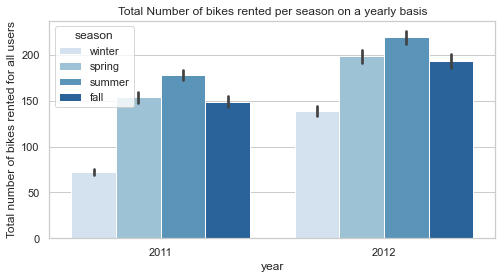

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x="year", y="all_users", hue = 'season', data=bikehourly_no_ouliers,palette='Blues')
plt.ylabel('Total number of bikes rented for all users')
plt.title('Total Number of bikes rented per season on a yearly basis')
plt.show()

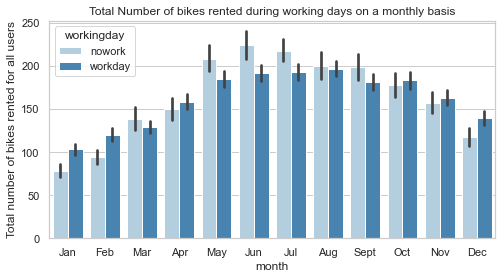

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x="month", y="all_users", hue = 'workingday', data=bikehourly_no_ouliers,palette='Blues')
plt.ylabel('Total number of bikes rented for all users')
plt.title('Total Number of bikes rented during working days on a monthly basis')
plt.show()

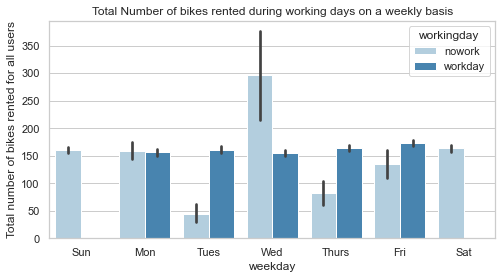

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(x="weekday", y="all_users", hue = 'workingday', data=bikehourly_no_ouliers,palette='Blues')
plt.ylabel('Total number of bikes rented for all users')
plt.title('Total Number of bikes rented during working days on a weekly basis')
plt.show()

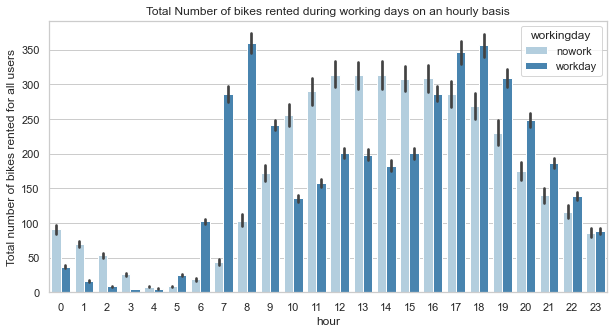

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x="hour", y="all_users", hue = 'workingday', data=bikehourly_no_ouliers,palette='Blues')
plt.ylabel('Total number of bikes rented for all users')
plt.title('Total Number of bikes rented during working days on an hourly basis')
plt.show()

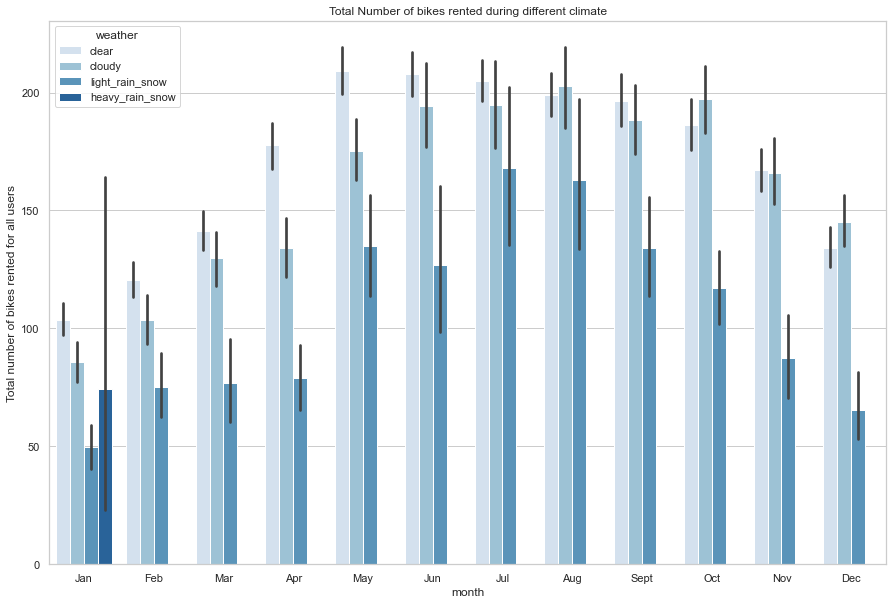

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x="month", y="all_users", hue = 'weather', data=bikehourly_no_ouliers,palette='Blues')
plt.ylabel('Total number of bikes rented for all users')
plt.title('Total Number of bikes rented during different climate')
plt.show()

In [8]:
# Feature Selection
bikehourly_no_ouliers = bikehourly_no_ouliers.drop(columns=['date','record_index','season','year','weather','casual_users','registered_users'])

In [9]:
x=bikehourly_no_ouliers.drop(['all_users'],axis=1)
y=bikehourly_no_ouliers['all_users']
x = preprocessing.normalize(x)

In [10]:
# dividing into training and testing sets to be ready for any model or algorithm to work
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [55]:
# Creating Model
linear_reg_model = LinearRegression()

# Training Model
linear_reg_model.fit(x_train, y_train)
y_predicted = linear_reg_model.predict(x_test)

# Prediction
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)

# Evaluation
print("Linear Regression MSE:",mse)
print("Linear Regression RMSE:",rmse)
print("Linear Regression R2 score:",r2)
print("Linear Regression MAE:",mae)

Linear Regression MSE: 13140.668645440976
Linear Regression RMSE: 114.63275555198425
Linear Regression R2 score: 0.3288123764022789
Linear Regression MAE: 91.46123065000899


In [56]:
# Creating Model
linear_lasso_model = Lasso()

# Training model
linear_lasso_model.fit(x_train, y_train)
y_predicted = linear_lasso_model.predict(x_test)

# Prediction
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)

# Evaluation
print("Lasso Regression MSE:",mse)
print("Lasso Regression RMSE:",rmse)
print("Lasso Regression R2 score:",r2)
print("Lasso Regression MAE:",mae)

Lasso Regression MSE: 14730.39416870768
Lasso Regression RMSE: 121.36883524491648
Lasso Regression R2 score: 0.24761376125386259
Lasso Regression MAE: 97.77281769211969


In [57]:
# Creating Model
polynomial_reg_model = PolynomialFeatures(degree=2)

# Training model
x_poly = polynomial_reg_model.fit_transform(x_train)
x_poly_test = polynomial_reg_model.fit_transform(x_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_predicted_p = model.predict(x_poly_test)

# Prediction
mse = mean_squared_error(y_test, y_predicted_p)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted_p)
mae = mean_absolute_error(y_test,y_predicted_p)

# Evaluation
print("Polynomial Regression MSE:",mse)
print("Polynomial Regression RMSE:",rmse)
print("Polynomial Regression R2 score:",r2)
print("Polynomial Regression MAE:",mae)

Polynomial Regression MSE: 10753.351966036664
Polynomial Regression RMSE: 103.698370122373
Polynomial Regression R2 score: 0.4507496576821397
Polynomial Regression MAE: 78.9286541214778


In [58]:
# Creating Model
linear_ridge_model = Ridge()

# Training model
linear_lasso_model.fit(x_train, y_train)
y_predicted = linear_lasso_model.predict(x_test)

# Prediction
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)

# Evaluation
print("Ridge Regression MSE:",mse)
print("Ridge Regression RMSE:",rmse)
print("Ridge Regression R2 score:",r2)
print("Ridge Regression MAE:",mae)

Ridge Regression MSE: 14730.39416870768
Ridge Regression RMSE: 121.36883524491648
Ridge Regression R2 score: 0.24761376125386259
Ridge Regression MAE: 97.77281769211969
